# Hate Speech and Offensive Language Detection


its 

In [ ]:
# Hate Speech Detection
# This scripts uses the hate speech detection model to classify a given text as hate speech, offensive speech or neither. 
# The model is trained using the dataset provided by the authors, im using LogisticRegression and DecisionTreeClassifier to train the model.
# The are some imbalance in the dataset, so i tried to used SMOTE, ADASYN and SMOTENC to balance the dataset. 
# The output of this model still not good enough

## Library

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

## Download the Data

In [11]:
# import dataset from kaggle
!kaggle datasets download -d thedevastator/hate-speech-and-offensive-language-detection

100%|█████████████████████████████████████████| 963k/963k [00:01<00:00, 663kB/s]
100%|█████████████████████████████████████████| 963k/963k [00:01<00:00, 663kB/s]


In [12]:
!unzip hate-speech-and-offensive-language-detection.zip -d data_input

Archive:  hate-speech-and-offensive-language-detection.zip
  inflating: data_input/train.csv    


## Loading the Data

In [2]:
# load dataset
data = pd.read_csv('data_input/train.csv')
data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [4]:
# check for missing values
data.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [5]:
# check for duplicates
data.duplicated().sum()

0

In [7]:
# check random tweet
data['tweet'][100]

'"@ClicquotSuave: LMAOOOOOOOOOOO this nigga @Krillz_Nuh_Care http://t.co/AAnpSUjmYI" &lt;bitch want likes for some depressing shit..foh'

## Data Preprocessing

In [11]:
import nltk
from nltk.corpus import stopwords

In [12]:
# clean the data 

stop_words = set(stopwords.words('english'))
# add some more stop words
stop_words.add('rt')

## remove special characters
def remove_special_char(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

## remove urls
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

## remove usernames and hashtags
def remove_usernames_hashtags(text):
    return re.sub(r'@\w+|#\w+', '', text)

## remove extra spaces
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text)

##  clean the text
def clean_text(text):
    text = text.lower()
    text = remove_special_char(text)
    text = remove_urls(text)
    text = remove_usernames_hashtags(text)
    text = remove_extra_spaces(text)
    return text

In [13]:
# apply the cleaning function to the dataset

data['cleaned_tweet'] = data['tweet'].apply(clean_text)

data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,cleaned_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely as a woman you shouldnt compl...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt cganderson vivabased she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts the shit you hear about me ...


In [15]:
# compared cleaned tweet with original tweet

data[['tweet', 'cleaned_tweet']].head(10)


,tweet,cleaned_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely as a woman you shouldnt compl...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt cganderson vivabased she look like a tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts the shit you hear about me ...
5,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",tmadisonx the shit just blows meclaim you so f...
6,"!!!!!!""@__BrighterDays: I can not just sit up ...",brighterdays i can not just sit up and hate on...
7,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,8220selfiequeenbri cause im tired of you big b...
8,""" &amp; you might not get ya bitch back &amp; ...",amp you might not get ya bitch back amp thats...
9,""" @rhythmixx_ :hobbies include: fighting Maria...",rhythmixx hobbies include fighting mariam bitch


In [16]:
# remove stop words

def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

data['cleaned_tweet_two'] = data['cleaned_tweet'].apply(remove_stop_words)

data.head()


,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,cleaned_tweet,cleaned_tweet_two
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely as a woman you shouldnt compl...,mayasolovely woman shouldnt complain cleaning ...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew17 boy dats coldtyga dwn bad for cuff...,mleew17 boy dats coldtyga dwn bad cuffin dat h...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt 80sbaby4life you eve...,urkindofbrand dawg 80sbaby4life ever fuck bitc...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt cganderson vivabased she look like a tranny,cganderson vivabased look like tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts the shit you hear about me ...,shenikaroberts shit hear might true might fake...


In [18]:
# compare cleaned tweet with original tweet

data[['tweet', 'cleaned_tweet', 'cleaned_tweet_two']].tail(10)


,tweet,cleaned_tweet,cleaned_tweet_two
24773,you niggers cheat on ya gf's? smh....,you niggers cheat on ya gfs smh,niggers cheat ya gfs smh
24774,you really care bout dis bitch. my dick all in...,you really care bout dis bitch my dick all in ...,really care bout dis bitch dick yo feelings
24775,"you worried bout other bitches, you need me for?",you worried bout other bitches you need me for,worried bout bitches need
24776,you're all niggers,youre all niggers,youre niggers
24777,you're such a retard i hope you get type 2 dia...,youre such a retard i hope you get type 2 diab...,youre retard hope get type 2 diabetes die suga...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,yous a muthafin lie 8220lifeasking 20pearls co...,yous muthafin lie 8220lifeasking 20pearls core...
24779,"you've gone and broke the wrong heart baby, an...",youve gone and broke the wrong heart baby and ...,youve gone broke wrong heart baby drove rednec...
24780,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like i aint fu...,young buck wanna eat dat nigguh like aint fuck...
24781,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies,youu got wild bitches tellin lies
24782,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...,ruffled ntac eileen dahlia beautiful color com...,ruffled ntac eileen dahlia beautiful color com...


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
 6   cleaned_tweet             24783 non-null  object
 7   cleaned_tweet_two         24783 non-null  object
dtypes: int64(5), object(3)
memory usage: 1.5+ MB


In [20]:
# remove short words

def remove_short_words(text):
    return ' '.join([word for word in text.split() if len(word) > 2])

data['cleaned_tweet_three'] = data['cleaned_tweet_two'].apply(remove_short_words)

In [25]:
data[['tweet', 'cleaned_tweet', 'cleaned_tweet_two', 'cleaned_tweet_three']].tail(10)


,tweet,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three
24773,you niggers cheat on ya gf's? smh....,you niggers cheat on ya gfs smh,niggers cheat ya gfs smh,niggers cheat gfs smh
24774,you really care bout dis bitch. my dick all in...,you really care bout dis bitch my dick all in ...,really care bout dis bitch dick yo feelings,really care bout dis bitch dick feelings
24775,"you worried bout other bitches, you need me for?",you worried bout other bitches you need me for,worried bout bitches need,worried bout bitches need
24776,you're all niggers,youre all niggers,youre niggers,youre niggers
24777,you're such a retard i hope you get type 2 dia...,youre such a retard i hope you get type 2 diab...,youre retard hope get type 2 diabetes die suga...,youre retard hope get type diabetes die sugar ...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,yous a muthafin lie 8220lifeasking 20pearls co...,yous muthafin lie 8220lifeasking 20pearls core...,yous muthafin lie 8220lifeasking 20pearls core...
24779,"you've gone and broke the wrong heart baby, an...",youve gone and broke the wrong heart baby and ...,youve gone broke wrong heart baby drove rednec...,youve gone broke wrong heart baby drove rednec...
24780,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like i aint fu...,young buck wanna eat dat nigguh like aint fuck...,young buck wanna eat dat nigguh like aint fuck...
24781,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies,youu got wild bitches tellin lies,youu got wild bitches tellin lies
24782,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...,ruffled ntac eileen dahlia beautiful color com...,ruffled ntac eileen dahlia beautiful color com...,ruffled ntac eileen dahlia beautiful color com...


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
 6   cleaned_tweet             24783 non-null  object
 7   cleaned_tweet_two         24783 non-null  object
 8   cleaned_tweet_three       24783 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.7+ MB


In [24]:
data.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
cleaned_tweet               0
cleaned_tweet_two           0
cleaned_tweet_three         0
dtype: int64

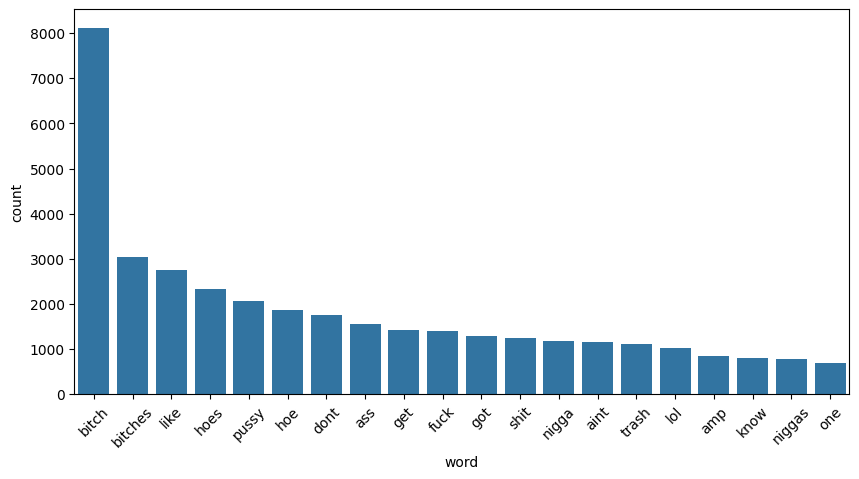

In [28]:
# find the most common words in the dataset

from collections import Counter

words = data['cleaned_tweet_three'].apply(lambda x: [word for word in x.split()])

# most common words in the dataset (general)
words = [word for sublist in words for word in sublist]
word_count = Counter(words)
word_count.most_common(20)

# visualize the most common words
import matplotlib.pyplot as plt

word_count_df = pd.DataFrame(word_count.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=word_count_df)
plt.xticks(rotation=45)
plt.show()

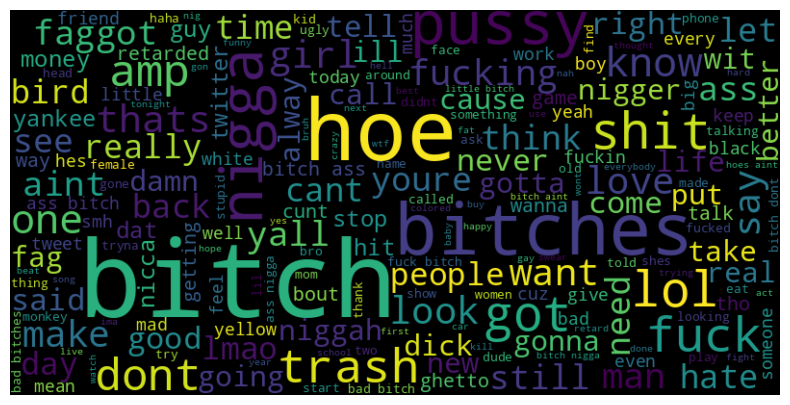

In [29]:
# same with before, but using word cloud

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

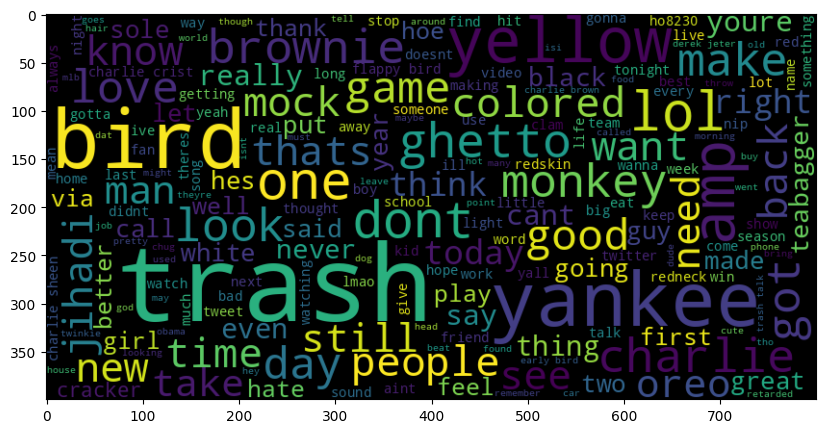

In [55]:
# now im curios. how about the most common words for only the neutral class?
# im assumming that neutral class is number 2 in the class column from looking a bit of the dataset

neutral_tweets = data[data['class'] == 2]['cleaned_tweet_three']
neutral_words = neutral_tweets.apply(lambda x: [word for word in x.split()])

neutral_words = [word for sublist in neutral_words for word in sublist]
neutral_word_count = Counter(neutral_words)
neutral_word_count.most_common(20)

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(neutral_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

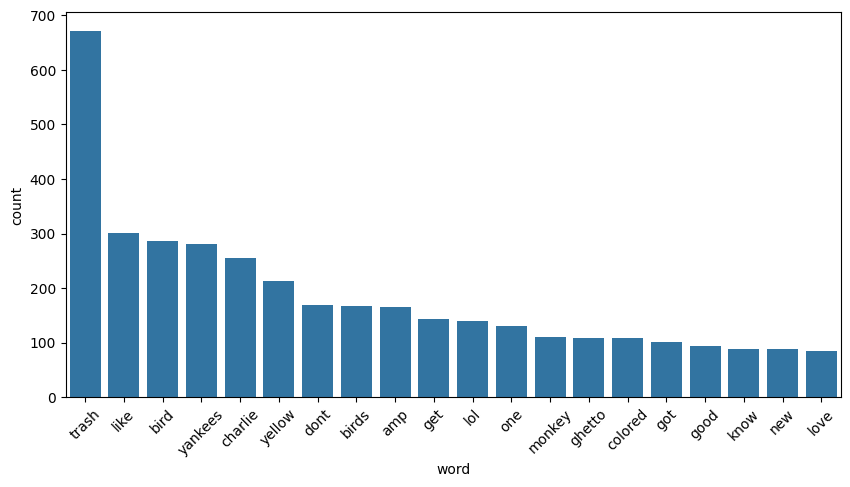

In [56]:
# visualize the most common words in neutral tweets

neutral_word_count_df = pd.DataFrame(neutral_word_count.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=neutral_word_count_df)
plt.xticks(rotation=45)
plt.show()

well its quite unexpected, why does trash belong to neutral label? lets take a deeper look

In [57]:
# show thow many tweet that include the word trash in it

data[data['cleaned_tweet_three'].str.contains('trash')]
data[data['cleaned_tweet_three'].str.contains('trash')]['class'].value_counts()



class
2    681
1    349
0    109
Name: count, dtype: int64

In [63]:
# show five random  full tweets that include the word trash in it

pd.set_option('display.max_colwidth', None)
full_tweets_with_word_trash = data[data['cleaned_tweet_three'].str.contains('trash')]['cleaned_tweet_three'].sample(5)
print(full_tweets_with_word_trash)

22395            hoes start actually fucking ill give props hoes trash 128078128078128078128129128079128080128522
2572                       beekayns alas proficient neither skills limited pointless stat memorization trash talk
5519     andersondrlja sick self serving politicians standing trashes america wearerepublicnotregime impeachobama
16681               nohoesnextdoor make beat pencil class teacher says keep making trash ass beat ill fail ht8230
4933                                                                        thelittlefella favor ball throw trash
Name: cleaned_tweet_three, dtype: object


after taking a quick look. there goes the exploratory data analysis.. i believed its kinda bias to the neutral class having a trash word on it, but i think its okay for now.

## Model

In [68]:
# classify the tweets between hate speech, offensive language and neither

tweet = list(data['cleaned_tweet_three'])
label = list(data['class'])

In [69]:
# split the data into training and testing set

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(tweet, label, test_size=0.2, random_state=42)

In [40]:
# vectorize the cleaned_tweet_three column
tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [41]:
# see the shape of the vectorized data

X_train_tfidf.shape, X_test_tfidf.shape

((19826, 5000), (4957, 5000))

In [42]:
# train the model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# make predictions
y_pred = model.predict(X_test_tfidf)

# evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.16      0.24       290
           1       0.91      0.96      0.94      3832
           2       0.83      0.81      0.82       835

    accuracy                           0.89      4957
   macro avg       0.75      0.64      0.66      4957
weighted avg       0.87      0.89      0.88      4957



In [43]:
# pipeline the model with count vectorizer and logistic regression

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

pipe = Pipeline([
    ('vectorizer', CountVectorizer(max_features=5000)),
    ('model', LogisticRegression())
])

pipe.fit(X_train, y_train)

# make predictions
y_pred_pipe = pipe.predict(X_test)

# evaluate the model
print(classification_report(y_test, y_pred_pipe))

              precision    recall  f1-score   support

           0       0.49      0.23      0.31       290
           1       0.92      0.95      0.94      3832
           2       0.82      0.85      0.84       835

    accuracy                           0.89      4957
   macro avg       0.74      0.68      0.70      4957
weighted avg       0.88      0.89      0.88      4957



In [44]:
# test the model with a hate speech tweet

tweet = ['I hate you']

tweet_tfidf = tfidf.transform(tweet)
model.predict(tweet_tfidf)

array([0])

In [45]:
# test the model with a offensive speech tweet

tweet = ['You are so stupid']

tweet_tfidf = tfidf.transform(tweet)
model.predict(tweet_tfidf)


array([1])

In [47]:
# test the model with a neutral tweet

tweet = ['I am learning data science']

tweet_tfidf = tfidf.transform(tweet)
model.predict(tweet_tfidf)


array([2])

i'm assumming based on the result that 0 is hate speech, 1 is offensive language and 2 is neutral

In [73]:
# based on the 2 previous model its prettr sure has really imbalance class by looking at the score value on class 0. i will try to use SMOTE to balance the class

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)


In [74]:
# train the model with the balanced data

model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

# make predictions
y_pred_smote = model_smote.predict(X_test_tfidf)

# evaluate the model
print(classification_report(y_test, y_pred_smote))


              precision    recall  f1-score   support

           0       0.29      0.57      0.38       290
           1       0.96      0.85      0.91      3832
           2       0.77      0.90      0.83       835

    accuracy                           0.85      4957
   macro avg       0.67      0.77      0.71      4957
weighted avg       0.89      0.85      0.86      4957



In [75]:

# sss... the model got worse. i will try to use hyperparameter tuning to improve the model
# hyperparameter tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_smote, y_train_smote)

# best parameters
grid_search.best_params_
print('Best parameters', grid_search.best_params_)

# best score

print('Best score', grid_search.best_score_)

# make predictions
y_pred_grid = grid_search.predict(X_test_tfidf)


Best parameters {'C': 100, 'penalty': 'l2'}
Best score 0.9342363981489867


In [76]:
print(classification_report(y_test, y_pred_grid))

# nvm the model got worse on the class 0 score. i will try different model

              precision    recall  f1-score   support

           0       0.22      0.37      0.27       290
           1       0.92      0.88      0.90      3832
           2       0.80      0.79      0.80       835

    accuracy                           0.83      4957
   macro avg       0.65      0.68      0.66      4957
weighted avg       0.86      0.83      0.84      4957



In [71]:
# still not good enough. i will try to use another model

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_smote, y_train_smote)

# make predictions
y_pred_rf = model_rf.predict(X_test_tfidf)

# evaluate the model
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.38      0.40      0.39       290
           1       0.94      0.92      0.93      3832
           2       0.78      0.85      0.81       835

    accuracy                           0.87      4957
   macro avg       0.70      0.72      0.71      4957
weighted avg       0.88      0.87      0.88      4957



In [78]:
# improve the model imbalance class ADASYN

from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_tfidf, y_train)

# train the model with the balanced data

model_adasyn = RandomForestClassifier()
model_adasyn.fit(X_train_adasyn, y_train_adasyn)

# make predictions
y_pred_adasyn = model_adasyn.predict(X_test_tfidf)

# evaluate the model
print(classification_report(y_test, y_pred_adasyn))


              precision    recall  f1-score   support

           0       0.39      0.40      0.39       290
           1       0.94      0.92      0.93      3832
           2       0.78      0.86      0.82       835

    accuracy                           0.88      4957
   macro avg       0.70      0.72      0.71      4957
weighted avg       0.88      0.88      0.88      4957



In summary, the main difference between ADASYN and SMOTE is in their approach to oversampling

- SMOTE generates synthetic samples uniformly across the feature space, 
- while ADASYN places more emphasis on generating synthetic samples in areas where the classification is difficult, thereby adapting the oversampling based on the dataset’s specific challenges. but the result doesnt change much on the class 0 scores overall

now the **SMOTENC** (Synthetic Minority Over-sampling Technique for Nominal and Continuous features) is an extension of the SMOTE algorithm specifically designed to handle datasets with both categorical and numerical features.

In [80]:
# generate more data so the model can learn more on the minority class

from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC(categorical_features=[0], random_state=42)

X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train_tfidf, y_train)

# train the model with the balanced data
model_smotenc = RandomForestClassifier()
model_smotenc.fit(X_train_smotenc, y_train_smotenc)

# make predictions
y_pred_smotenc = model_smotenc.predict(X_test_tfidf)

# evaluate the model
print(classification_report(y_test, y_pred_smotenc))


              precision    recall  f1-score   support

           0       0.39      0.39      0.39       290
           1       0.94      0.92      0.93      3832
           2       0.79      0.85      0.82       835

    accuracy                           0.88      4957
   macro avg       0.70      0.72      0.71      4957
weighted avg       0.88      0.88      0.88      4957



## Summary

### First Model (Logistic Regression):
|           | Precision | Recall | F1-Score | Support |
|-----------|-----------|--------|----------|---------|
| Class 0   | 0.49      | 0.16   | 0.24     | 290     |
| Class 1   | 0.91      | 0.96   | 0.94     | 3832    |
| Class 2   | 0.83      | 0.81   | 0.82     | 835     |
|-----------|-----------|--------|----------|---------|
| Accuracy  |           |        | 0.89     | 4957    |
| Macro Avg | 0.75      | 0.64   | 0.66     | 4957    |
| Weighted Avg | 0.87   | 0.89   | 0.88     | 4957    |

### Model After SMOTENC (Random Forest):
|           | Precision | Recall | F1-Score | Support |
|-----------|-----------|--------|----------|---------|
| Class 0   | 0.39      | 0.39   | 0.39     | 290     |
| Class 1   | 0.94      | 0.92   | 0.93     | 3832    |
| Class 2   | 0.79      | 0.85   | 0.82     | 835     |
|-----------|-----------|--------|----------|---------|
| Accuracy  |           |        | 0.88     | 4957    |
| Macro Avg | 0.70      | 0.72   | 0.71     | 4957    |
| Weighted Avg | 0.88   | 0.88   | 0.88     | 4957    |

- Precision: The precision values for class 0 decreased from 0.49 to 0.39 after applying SMOTENC. However, precision values for classes 1 and 2 remained relatively high in both models.

- Recall: The recall values for class 0 slightly increased from 0.16 to 0.39 after applying SMOTENC, indicating an improvement in capturing true positive instances for this class. Recall values for classes 1 and 2 remained stable in both models.

- F1-score: The F1-scores for class 0 increased from 0.24 to 0.39 after applying SMOTENC, reflecting the improvement in precision and recall for this class. F1-scores for classes 1 and 2 remained consistent in both models.

- Accuracy: The overall accuracy decreased slightly from 0.89 to 0.88 after applying SMOTENC.

In [82]:
## class weighting to adjust the imbalance class
model_weighted = RandomForestClassifier(class_weight='balanced')

model_weighted.fit(X_train_tfidf, y_train)

# make predictions
y_pred_weighted = model_weighted.predict(X_test_tfidf)

# evaluate the model
print(classification_report(y_test, y_pred_weighted))

              precision    recall  f1-score   support

           0       0.51      0.21      0.30       290
           1       0.93      0.95      0.94      3832
           2       0.79      0.88      0.83       835

    accuracy                           0.89      4957
   macro avg       0.74      0.68      0.69      4957
weighted avg       0.88      0.89      0.88      4957



currently several improvements that i made doesnt help the score for the class 0. from ChaDGPT recommends me to use Ensemble Methods, including bagging, boosting or stacking to combine multiple classifiers

In [101]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a bagging classifier
bagging_classifier = BaggingClassifier(DecisionTreeClassifier( max_depth=100,random_state=42,criterion='entropy'),
                                         n_estimators=100,random_state=42,)
# Train the bagging classifier
bagging_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_bagging = bagging_classifier.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

           0       0.46      0.21      0.29       290
           1       0.94      0.93      0.94      3832
           2       0.77      0.93      0.84       835

    accuracy                           0.89      4957
   macro avg       0.72      0.69      0.69      4957
weighted avg       0.88      0.89      0.88      4957



In [108]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(DecisionTreeClassifier( max_depth=100,random_state=42,criterion='entropy'),
                                         n_estimators=100,random_state=42,)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_adaboost = adaboost_classifier.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.37      0.25      0.30       290
           1       0.92      0.93      0.92      3832
           2       0.79      0.82      0.80       835

    accuracy                           0.87      4957
   macro avg       0.69      0.67      0.68      4957
weighted avg       0.86      0.87      0.87      4957

